<a href="https://colab.research.google.com/github/bongjoonsiong/ML-Financial/blob/main/JoonSiong_Bong_VI_CapStoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

The recent advacement of e-commerce and digital payments have sparked a rapid evolving in cyber criminals and causing an increase in financial scam cases such as credit card fraud. However, with trillions of card transaction occurs everyday, detection of credit card fraud has become an up-hill task and challenging. Fortunately, banks and financial instituitions can now implement an Artificial Intelligence mechanisms to detect the credit card fraud. This can be realized by a properly optimized machine learning algorithm.

Features of credit card frauds play vital role when machine learning is employed for credit card fraud detection, and they must be chosen properly. The objectice of this capstone project is to demonstrate how banks can implement a machine learning based credit card fraud detection model to predict whether a new transaction is fraudulent or not based on historical fraud transaction data on certain features such as "use chip" or "use pin number", "distance from home", "online order" etc..



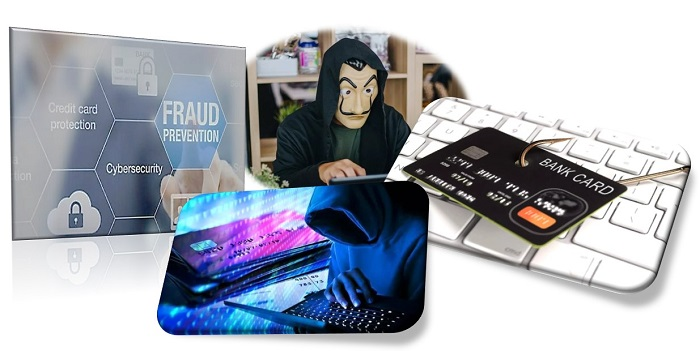

# Process Flow
a. Data Preprocessing - Initial Datasets Verification and Cleansing
- Initial dataset verification
- Check number of features and target variables
- Check any missing, NaN or duplicate value
- Impute or remove missing, NaN and duplicate value


b. EDA (Explortory Data Analysis)
- Analyse the data distribution pattern
- Check if the dataset is imbalance
- Implement sub-sampling if dataset is imbalance
- Convert categorical data into numerical data using Label Encoder or OneHot Encoding
- Apply Normalizaton and Standardization if necessary
- Analyse and identify the strongest correlation between features

c. Feature Engineering
- Remove features that do not contribute to the target
- Create extra features that could improve the performance of the model

d. Apply Machines Learning Algorithm
- Split the dataset into training and testing set
- Apply different ML Alogorithms using Logistic Regression, KNN and Decision Tree
- Compare the performance and accuracy among the models and between different set of features.

e. Select the best model or Ensemble model for inference
- Fine tunning the model with Hyperparameters Tuning (GridSearh)


# About the Dataset

This Dataset is a large dataset comprises of credit card transaction records made by banks/financial institutions clients sourced by some unnamed institute. (All user names are not disclosed here to protect their identities).

### Features Explanation:
distancefromhome - the distance from home where the transaction happened.

distancefromlast_transaction - the distance from last transaction happened.

ratiotomedianpurchaseprice - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

usedpinnumber - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent(0:Non-Fraud, 1:Fraud).



# Step by Step Dataset Exploration
### Import Libraries/Packages

In [ ]:
#To enable all the output are displayed in a single cell (not only display the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Import essential python ML libraries - Pandas & Numpy
import numpy as np
import pandas as pd

# Import charting and visualization libraries-Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Import sklearn preprocessing libraries for dealing with categorical data and feature scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Import libraries for Confusion Matrix, GridSearchCV and parameters display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Import library for Train Test Split of dataset.
from sklearn.model_selection import train_test_split

# Suppress warnings if there is any
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [ ]:
# Import Dataset
# **This dataset is acquired from kaggle (credit_card) at https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

df = pd.read_csv('card_transdata.csv')

### Initial exploration to verify the imported dataset is correct

In [ ]:
df.head()
df.sample(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
420068,60.133953,4.105711,0.835959,1.0,0.0,0.0,1.0,0.0
407426,2.885849,0.050307,0.646230,1.0,0.0,0.0,1.0,0.0
819696,7.406251,1.976492,0.833822,1.0,0.0,0.0,0.0,0.0
919635,12.179236,2.595751,0.138657,1.0,0.0,1.0,1.0,0.0
540011,6.614072,0.755469,0.102874,1.0,0.0,0.0,1.0,0.0
356799,4.910415,0.636042,2.456570,1.0,1.0,0.0,0.0,0.0
550248,3.545518,5.706975,0.806311,1.0,0.0,1.0,1.0,0.0
16825,15.122802,9.474840,1.396590,1.0,0.0,0.0,1.0,0.0
409342,3.330890,1.188745,0.435910,1.0,0.0,0.0,1.0,0.0
252345,32.120195,0.042656,0.547812,1.0,0.0,0.0,1.0,0.0


In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# More detail information on each feature:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Data Preprocessing - Data Cleansing

#### Examine the Missing and NaN Values  
We will create a function to detect missing values in each column from such a large dataset.The function will displays the number and percentage of missing value, if any.  

In [ ]:
# Function to calculate missing values by column# Function
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
# Checking NaN values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
# Checking Duplicated values
df.duplicated().sum()

0

#### Remarks:
1. There are 1,000,000 row and 8 colomns. The target is column "Fraud", and the rest are features.
2. There is no missing or NaN or duplicated value. So NO data imputation or removal is needed for this dataset.
3. There is no categorical data (All dtype are float64). Therefore NO Label Encodering conversion is needed.

# Exploratory Data Analysis

#### Analyse the data distribution pattern

array([[<AxesSubplot:title={'center':'distance_from_home'}>,
        <AxesSubplot:title={'center':'distance_from_last_transaction'}>,
        <AxesSubplot:title={'center':'ratio_to_median_purchase_price'}>],
       [<AxesSubplot:title={'center':'repeat_retailer'}>,
        <AxesSubplot:title={'center':'used_chip'}>,
        <AxesSubplot:title={'center':'used_pin_number'}>],
       [<AxesSubplot:title={'center':'online_order'}>,
        <AxesSubplot:title={'center':'fraud'}>, <AxesSubplot:>]],
      dtype=object)

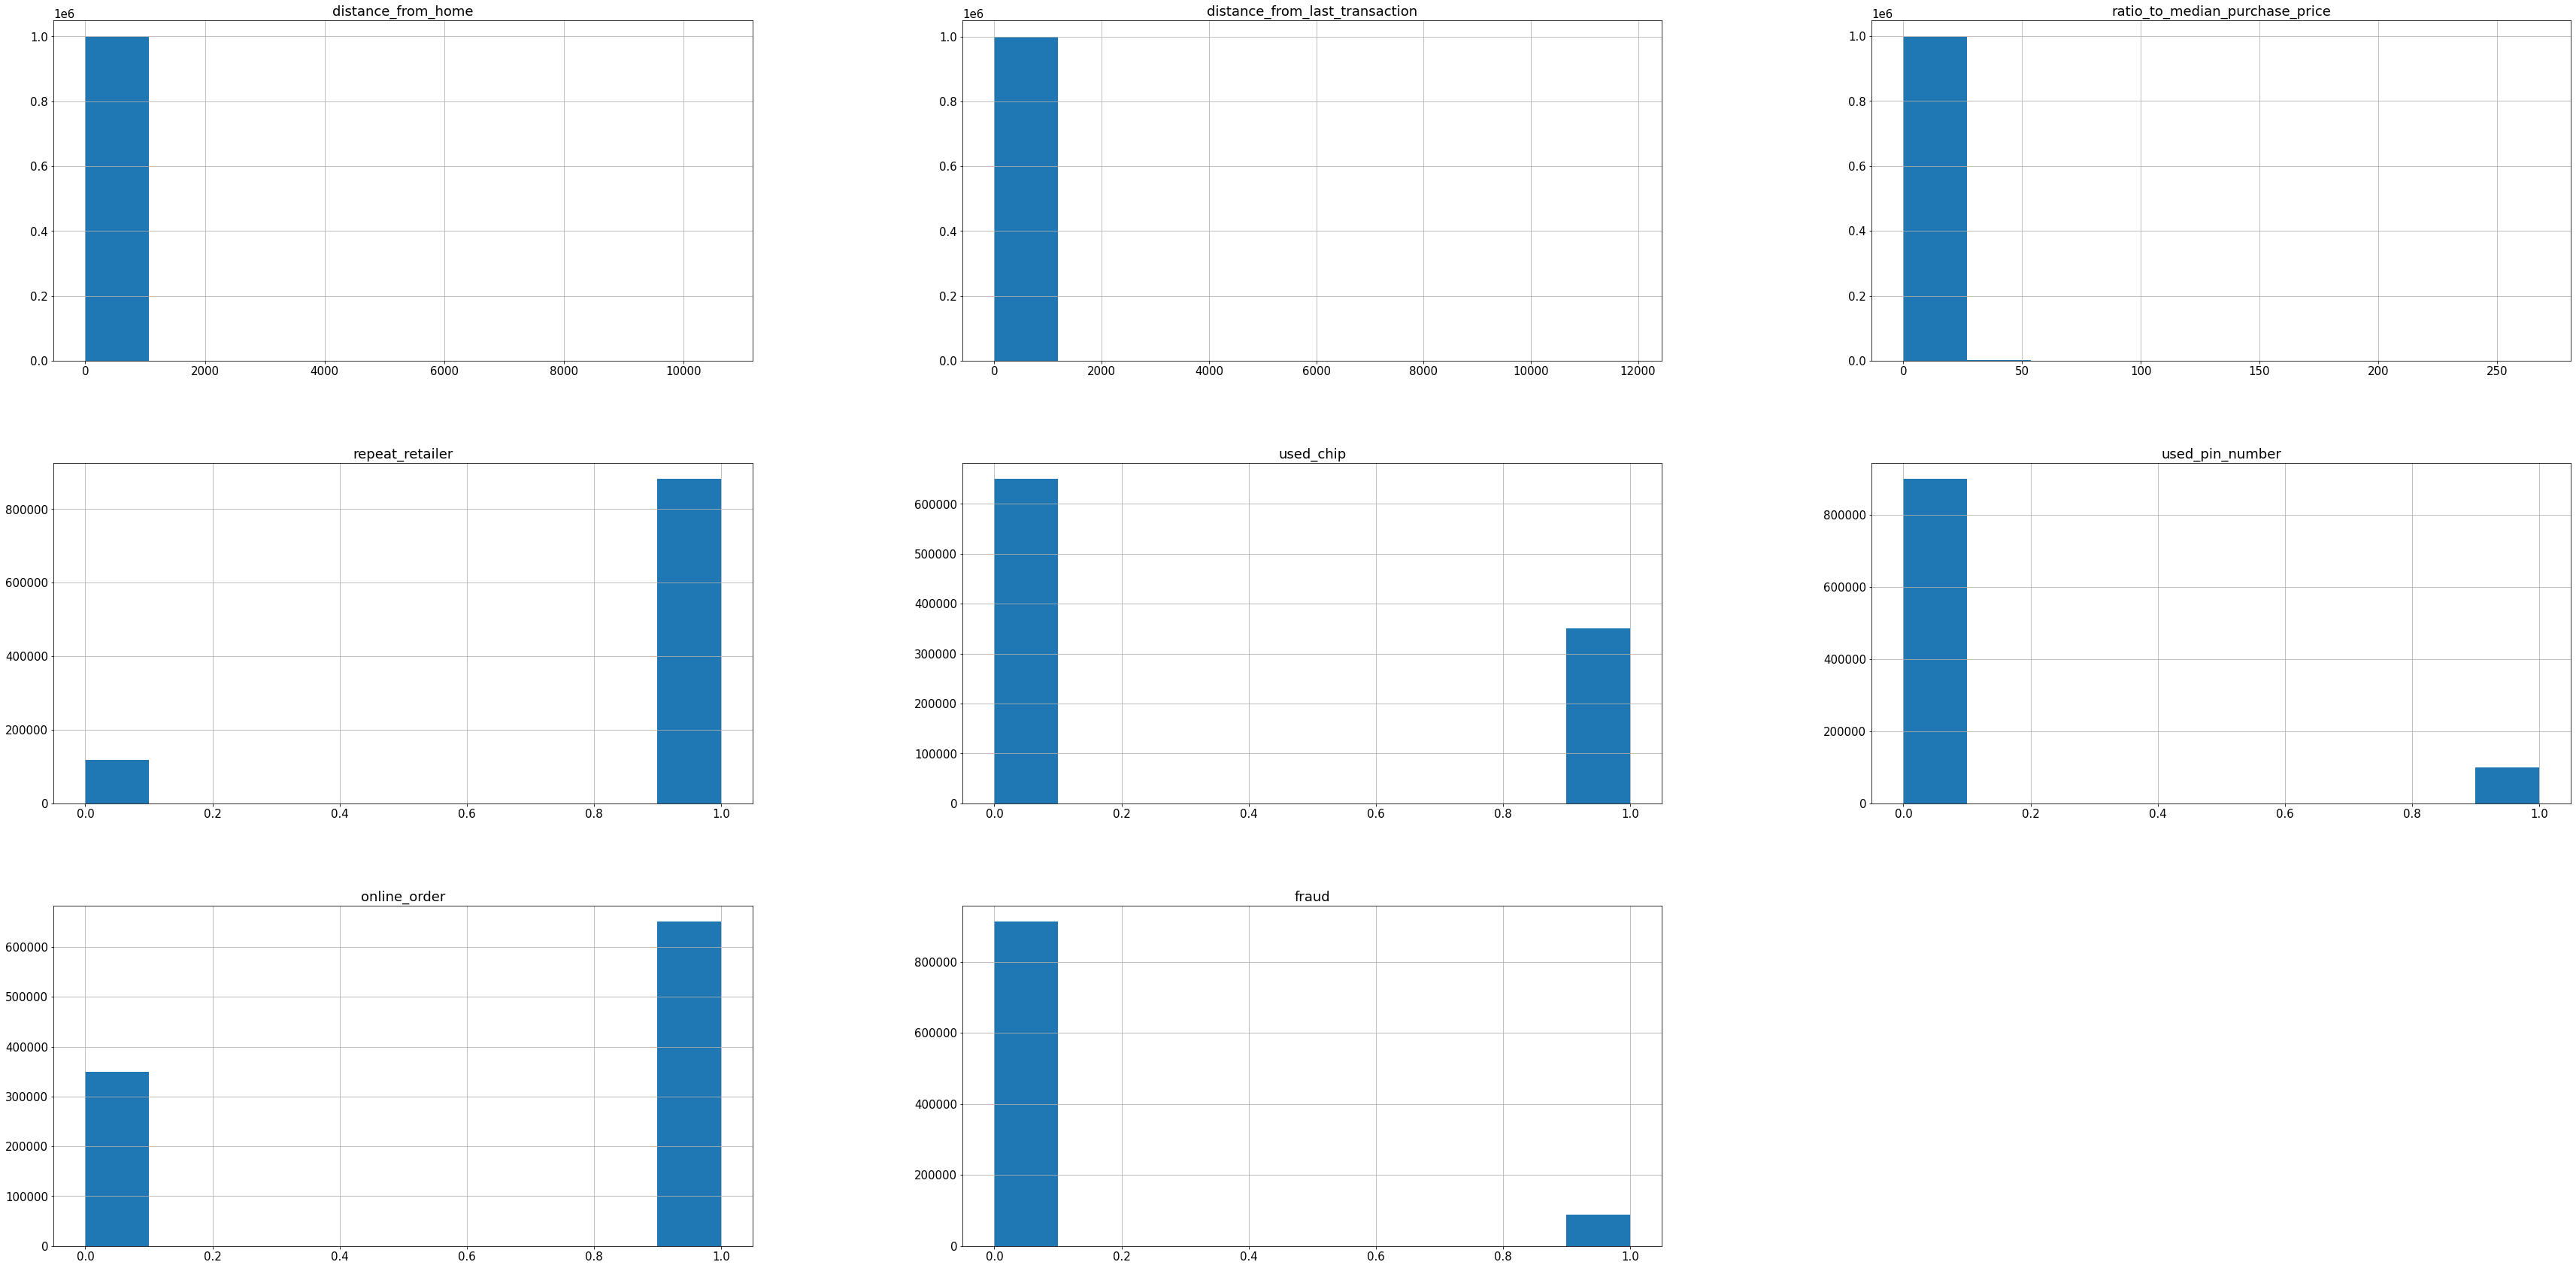

In [ ]:
df.hist(figsize= (60,30))
# double click histogram for zooming into details

#### Remarks:
The datasets is clearly skewed with some skewed to left and the others skewed to right. We will need to scale this dataset in later steps.  

### Examine the Distribution of the Target Column

The target is what we are asked to predict:
1. 0 indicating it is a NON-Fraudulent transaction.
2. 1 indicating it is a fraudulent transaction.
  
We can first examine the number of count in each category.

In [ ]:
# Number of fraud and non-fraud in datasets
print("Number of Fraudulant Cases: ", (df['fraud'].values == 1).sum())
print("Number of Non-Fraudulatn Cases: ", (df['fraud'].values != 1).sum())
print("Percentage of Fraudulatn Cases: ", (df['fraud'].values == 1).sum()/(df['fraud'].values != 1).sum()*100)


Number of Fraudulant Cases:  87403
Number of Non-Fraudulatn Cases:  912597
Percentage of Fraudulatn Cases:  9.577392868922427


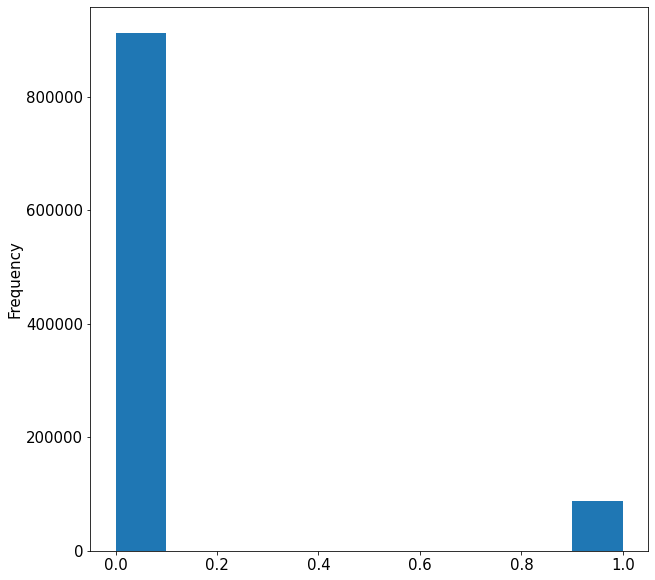

In [ ]:
# Plot a histogram
df['fraud'].astype(int).plot.hist();

#### Remarks:
The datasets is clearly imbalanced as the fraud data (87403) is far more less than the Non-Fraud data (912597), it is only about 9.58% of the total data only. Need to do undersampling in order to avoid bias when implement ML algorithms later on this dataset.

In [ ]:
# No fraud (class == 0) meaning legit transactions
# Fraud (class == 1) meaning fraudulent transactions

# Creating new data frames for No fraud and Fraud cases
no_fraud = df[df.fraud == 0]
fraud = df[df.fraud == 1]

# Resampling the original dataset with 10,000 datapoints
# Choose n = 87403 because the minority data (fraud) is 87403
no_fraud_resample = no_fraud.sample(n=87403)
fraud_resample = fraud.sample(n=87403)

# Creating a new dataset consisting of equal class occurence
df_resample = pd.concat([no_fraud_resample,fraud_resample],axis=0)

# Verify new dataset shape
df_resample.shape

(174806, 8)

## Correlation Analysis

### Inspect feature correlation by Feature Importance Plot

In [ ]:
#from sklearn.features import features.importance_
from sklearn.ensemble import ExtraTreesClassifier

X = df_resample.iloc[:, 0:7]
y = df_resample.iloc[:,-1]
model = ExtraTreesClassifier()
model.fit(X,y)

print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(8).plot(kind='barh')
plt.show()

NameError: name 'df_resample' is not defined

### Inspect features correlation by Heatmap plotting

In [ ]:
print("Correlation Matrix")
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(df_resample.corr(),cmap = 'coolwarm', linewidths = 5, fmt = '.2f',annot = True);

#### Remark:
1. Through the heatmap we can see which features are positively and negatively correlated.
2. Since this project is about predicting credit card fraud, lets see which features have strongest correlations with "fraud".

In [ ]:
#plottting another heatmap to have a clearer look at each feature correlation against "fraud".
plt.figure(figsize=(6,6))
fraud_corr = df_resample.corr()
sns.heatmap(fraud_corr[['fraud']].sort_values(by=['fraud']),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

#### Summary from Heatmap and Feature Importane Plot
- Negative correlation: 3 features.
- Positive correlation: 4 features.
- "ratio_To_median_purchase_price", "online_order", "distance_from_home" have the correlation score of more than 0.2.

# Feature Engineering

### Feature Selection for base model testing:
From the correlation analysis (Feature Importance_ & HeatMap), we can see that there are 4 features that have positive correlation and 3 features that have negative correlation with the Target (Fraud).
For the base model, we shall start with all features to have a overall view of the model responde to the original dataset.

In [ ]:
# Create y target
y = df_resample['fraud']
# Create independence variable X
X = df_resample.drop(['fraud'], axis = 1)

print('X shape :', X.shape)
print('y shape :', y.shape)
X.head()

X shape : (174806, 7)
y shape : (174806,)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
232479,0.508003,0.711306,1.284591,0.0,0.0,0.0,1.0
486733,5.775409,4.109663,1.440725,1.0,0.0,0.0,1.0
795283,0.734436,2.277319,1.547394,0.0,1.0,0.0,0.0
104627,14.118958,0.988370,0.825594,1.0,1.0,0.0,1.0
931807,41.364371,4.544594,0.090584,1.0,0.0,0.0,1.0


In [ ]:
# Since distance_from_home and distance_From_last_transaction have very large value, need to do data scaling
scaler = StandardScaler()

X_normal = scaler.fit_transform(X)
X_normal = pd.DataFrame(X_normal)

print("Standardize Dataset")
X_normal.head()

Standardize Dataset


,0,1,2,3,4,5,6
0,-0.422368,-0.214669,-0.512189,-2.710636,-0.665624,-0.244651,0.526361
1,-0.371637,-0.120641,-0.479231,0.368917,-0.665624,-0.244651,0.526361
2,-0.420187,-0.171340,-0.456715,-2.710636,1.502349,-0.244651,-1.899836
3,-0.291279,-0.207003,-0.609078,0.368917,1.502349,-0.244651,0.526361
4,-0.028873,-0.108607,-0.764229,0.368917,-0.665624,-0.244651,0.526361


## Logistic Regression Model with all features

In [ ]:
# initialize LogisticRegression
logreg = LogisticRegression()

# split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, random_state=2, test_size=0.2)

# train the model
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy is:', accuracy_score(y_test,y_pred))

LogisticRegression()

Accuracy is: 0.9413649104742292


<AxesSubplot:>

16640 labels are identified as True Positive out of 34962 test labels.
16272 labels are identified as True Negative out of 34962 test labels.


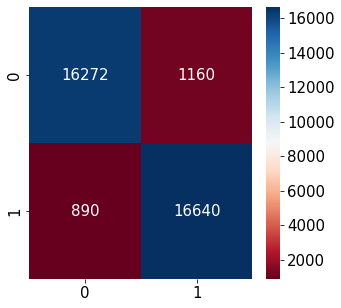

In [ ]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdBu', fmt='g')

TP = cm[1,1]
TN = cm[0,0]

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17432
         1.0       0.93      0.95      0.94     17530

    accuracy                           0.94     34962
   macro avg       0.94      0.94      0.94     34962
weighted avg       0.94      0.94      0.94     34962



<Figure size 360x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC')

<function matplotlib.pyplot.show(close=None, block=None)>

AUC score:  0.980326131404709


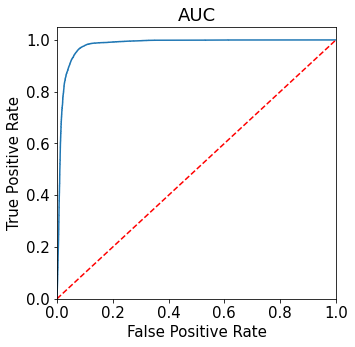

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# Calculate model's AUC
logreg_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.show
print('AUC score: ',roc_auc)

### Testing with 2nd Algorithm (KNN)
Since the result from Logistic Regression above has seemingly high accuracy, it is decided to test on 2nd base model with other algorithm to verify whether there is any overfitting when all the features are used.
KNN is chosen as 2nd base model test.

0.9969967393169727
0.9972541616612322
0.9969395343515817
0.9964246896630627
0.9961672673188032
0.9959956524226303
0.9956238201475888
0.9955952176648933
0.9955094102168068
0.9951375779417654


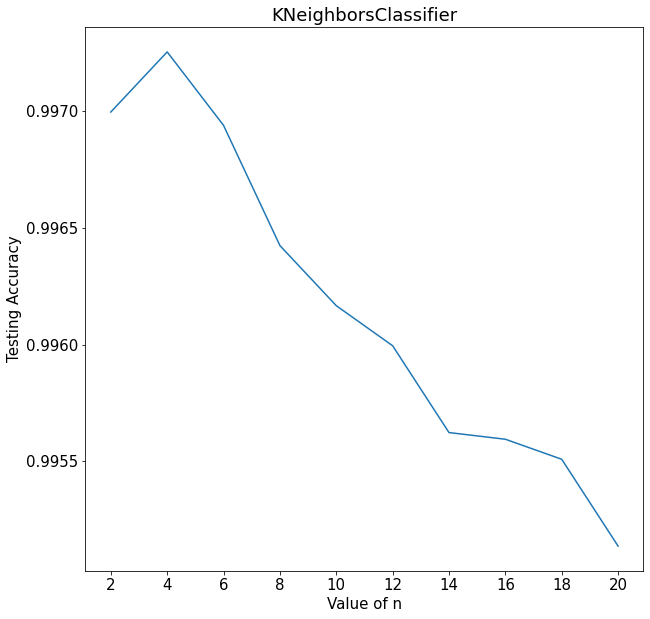

In [ ]:
# split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, random_state=2, test_size=0.2)

scores = []

#Determine the best n_neighbors value
for n in range(2, 21,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    _ = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

_ = plt.plot(scores)
_ = plt.xticks(ticks=range(10), labels=range(2,21,2))
_ = plt.rcParams['figure.figsize'] = (5,5)
_ = plt.title("KNeighborsClassifier")
_ = plt.xlabel('Value of n')
_ = plt.ylabel('Testing Accuracy')

<AxesSubplot:>

17501 labels are identified as True Positive out of 34962 test labels.
17365 labels are identified as True Negative out of 34962 test labels.


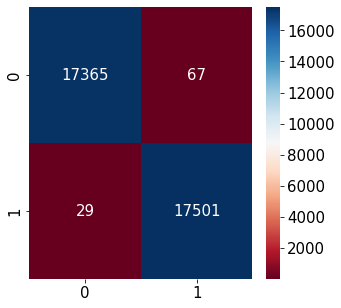

In [ ]:
# Re-run KNN and set n_neighbors = 4 (based on the above result)
knn = KNeighborsClassifier(n_neighbors = 4)
_ = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdBu', fmt='g')

TP = cm[1,1]
TN = cm[0,0]

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17432
         1.0       1.00      1.00      1.00     17530

    accuracy                           1.00     34962
   macro avg       1.00      1.00      1.00     34962
weighted avg       1.00      1.00      1.00     34962



<Figure size 360x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC')

<function matplotlib.pyplot.show(close=None, block=None)>

AUC score:  0.9989485670274285


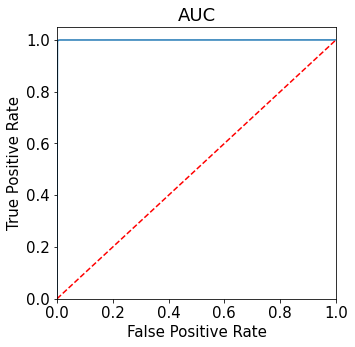

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# calculate model's AUC
knn_auc = roc_auc_score(y_test, knn.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.show
print('AUC score: ',roc_auc)

## Feature Engineering
### Features re-Selection
As we can see the models tend to overfit if all features are used, we are now will re-try by only choosing the top 3 features that have correlation value > 0.2 and drop the rest to build the prediction model.
These includes:
- distance_from_home
- online order
- ratio_to_median_purchase_price

In [ ]:
y = df_resample['fraud']
X = df_resample.drop(['fraud', "used_pin_number", "used_chip", "repeat_retailer", "distance_from_last_transaction"], axis = 1)

print('X shape :', X.shape)
print('y shape :', y.shape)
X.head()

X shape : (174806, 3)
y shape : (174806,)


,distance_from_home,ratio_to_median_purchase_price,online_order
232479,0.508003,1.284591,1.0
486733,5.775409,1.440725,1.0
795283,0.734436,1.547394,0.0
104627,14.118958,0.825594,1.0
931807,41.364371,0.090584,1.0


#### Standardization

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one. Since there is huge different between distance_from_home and ratio_to_median_purchase_price with online_Order, we need to rescale (normalize) the first 2 features so that all of them are in the same range (0 -> 1) and thus improve the overall model's performance.


In [ ]:
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)
X_normal = pd.DataFrame(X_normal)
print("Standardize Dataset")
X_normal.head()

Standardize Dataset


,0,1,2
0,-0.422368,-0.512189,0.526361
1,-0.371637,-0.479231,0.526361
2,-0.420187,-0.456715,-1.899836
3,-0.291279,-0.609078,0.526361
4,-0.028873,-0.764229,0.526361


## Logistic Regression Model with few selected features


In [ ]:
# initialize LogisticRegression
logreg = LogisticRegression()

# split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, random_state=2, test_size=0.2)

#scaling the features as we have observed from charts above, the spread of the features are extreme.
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.fit_transform(X_test)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))

LogisticRegression()

Accuracy: 0.9087008752359704


<AxesSubplot:>

15823 labels are identified as True Positive out of 34962 test labels.
15947 labels are identified as True Negative out of 34962 test labels.


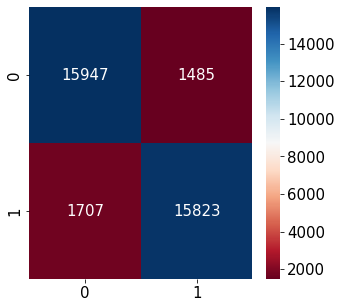

In [ ]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)

sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdBu', fmt='g')

TP = cm[1,1]
TN = cm[0,0]

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.91     17432
         1.0       0.91      0.90      0.91     17530

    accuracy                           0.91     34962
   macro avg       0.91      0.91      0.91     34962
weighted avg       0.91      0.91      0.91     34962



<Figure size 720x720 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC')

<function matplotlib.pyplot.show(close=None, block=None)>

AUC score:  0.9537511810213501


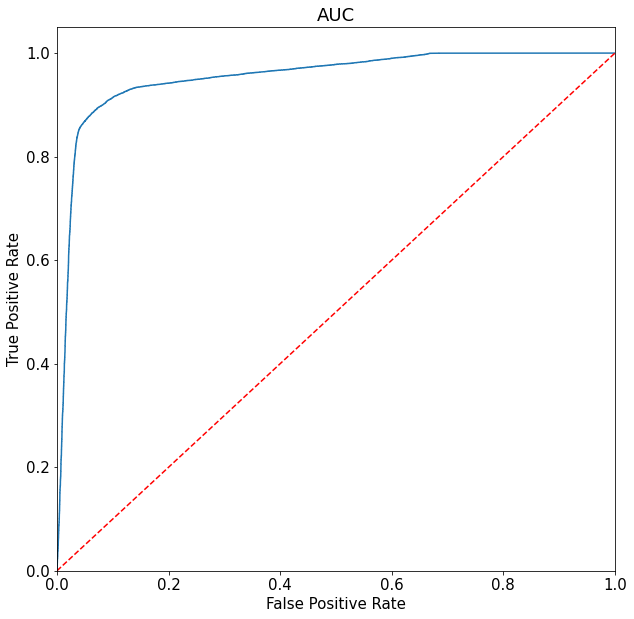

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# Calculate model's AUC
logreg_auc = roc_auc_score(y_test, logreg.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.show
print('AUC score: ',roc_auc)

### Logistic Regression Finding
- Training size 80%, testing size 20%.
- 31770 labels out of 34,962 labels are correctly classified, thus yield a prediction accuracy of 90.87%.
- This result implies less overfitting concern compare to when all features are used in the prediction.
- AUC score is 0.9538



## K-Nearest Neighbors (KNN) Implementation

0.9341570848349636
0.9536067730679023
0.9556089468565871
0.9561237915451061
0.9560379840970196
0.9558091642354556
0.9554659344431097
0.9550368972026771
0.9550082947199817
0.9547794748584177


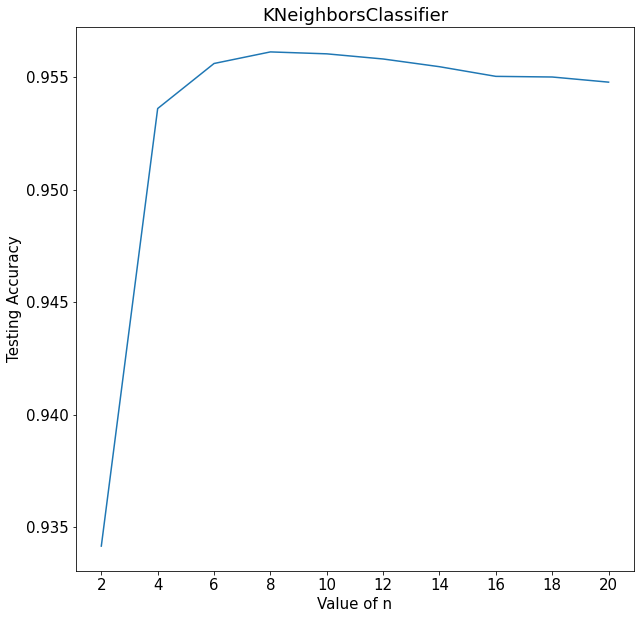

In [ ]:
# split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, random_state=2, test_size=0.2)

scores = []

for n in range(2, 21,2):
    knn = KNeighborsClassifier(n_neighbors = n)
    _ = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

_ = plt.plot(scores)
_ = plt.xticks(ticks=range(10), labels=range(2,21,2))
_ = plt.rcParams['figure.figsize'] = (5,5)
_ = plt.title("KNeighborsClassifier")
_ = plt.xlabel('Value of n')
_ = plt.ylabel('Testing Accuracy')

<AxesSubplot:>

16424 labels are identified as True Positive out of 34962 test labels.
17004 labels are identified as True Negative out of 34962 test labels.


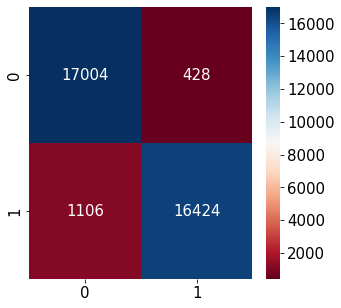

In [ ]:
# Re-run KNN and set n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors = 8)
_ = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdBu', fmt='g')
TP = cm[1,1]
TN = cm[0,0]
print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96     17432
         1.0       0.97      0.94      0.96     17530

    accuracy                           0.96     34962
   macro avg       0.96      0.96      0.96     34962
weighted avg       0.96      0.96      0.96     34962



<Figure size 360x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC')

<function matplotlib.pyplot.show(close=None, block=None)>

AUC score:  0.9658836212595101


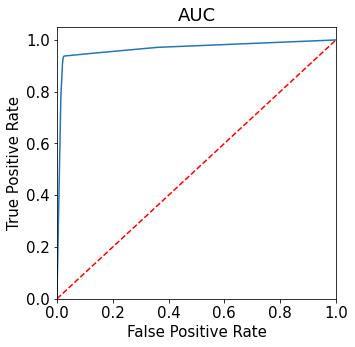

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

knn_auc = roc_auc_score(y_test, knn.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % knn_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.show
print('AUC score: ',roc_auc)


### K-Nearest NeighborsClassifer Finding
- Training size 80%, testing size 20%.
- From the n_neighbor iteration graph, it is found that n = 8 will generate the best testing accuracy.
- 33,428 labels out of 34,962 labels are correctly classified for n=8, thus yield a prediction accuracy of 95.61%.
- AUC score is 0.9659.
- KNN is a better model compare to Logistic Regression.

## Decision Tree Implementation

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize LogisticRegression

dt = DecisionTreeClassifier()

# Split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal,y, random_state=2, test_size=0.2)

# Training of Decision Tree model
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print('Accuracy:', accuracy_score(y_test,y_pred))

DecisionTreeClassifier()

Accuracy: 0.9201132658314741


<AxesSubplot:>

16103 labels are identified as True Positive out of 34962 test labels.
16066 labels are identified as True Negative out of 34962 test labels.


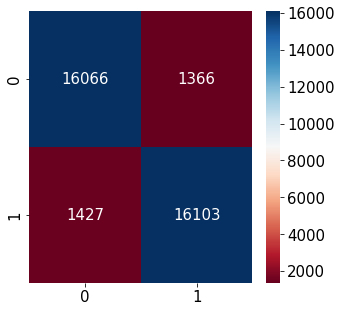

In [ ]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'RdBu', fmt='g')

TP = cm[1,1]
TN = cm[0,0]

print(f"{TP} labels are identified as True Positive out of {cm.sum()} test labels.")
print(f"{TN} labels are identified as True Negative out of {cm.sum()} test labels.")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92     17432
         1.0       0.92      0.92      0.92     17530

    accuracy                           0.92     34962
   macro avg       0.92      0.92      0.92     34962
weighted avg       0.92      0.92      0.92     34962



<Figure size 360x360 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'AUC')

<function matplotlib.pyplot.show(close=None, block=None)>

AUC score:  0.9201175288046165


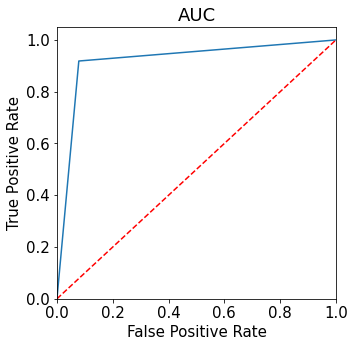

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

# Calculate model's AUC
dt_auc = roc_auc_score(y_test, dt.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC')
plt.show
print('AUC score: ',roc_auc)

### Decision Tree Finding
- Training size 80%, testing size 20%.
- 32,169 labels out of 34,962 labels are correctly classified, thus yield a prediction accuracy of 92.01%.
- AUC score is 0.92
- It is found that Decision Tree performance is better than Logistic Regression but not as good as KNN.

## Hyperparameter Value Tuning
From the above result, it is found that KNN has the highest accuracy compared to Decision Tree and Logistic Regression.
Therefore, we will choose KNN and try to implement Hyperparameter Tuning on it to find the best set of hyperparameters.

### GRID SEARCH
We will use Grid Search method to implement this Hyperparameter Value Tuning.
Choosing the right hyperparameters is an art It is a tedious task and requires a lot of time and effort!
That’s where GridSearch will save us time, effort and resources to find the optimal hyperparameter
Grid Search will set up a grid of hyperparameter values and for each combination, train a model and score on the validation data.


In [ ]:
# Import GridSearch Library
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Setup our GridSearch Parmaters

search_parameters = {
    'n_neighbors':  [3,50],
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto"),
    'p':            [1,2] #type of distance, manhattan vs euclidean
}

In [ ]:
# Split X and y into training and testing sets. train size 80%, test size 20%
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, random_state=2, test_size=0.2)
knn = KNeighborsClassifier()

# Initial GridSearchCV
knn_cv = GridSearchCV(knn, search_parameters, cv=5)

# Fit with training data
knn_cv.fit(X_train, y_train)

print("Running Permutation..............")
print("Hyperparamaters Tunning Completed")
print("Best Estimator:", knn_cv.best_estimator_.n_neighbors)
print("Best score: " + str(knn_cv.best_score_))
print("Best params: " + str(knn_cv.best_params_))

# Make predictions using the new model.
best_test_predictions = knn_cv.predict(X_test)

# Get the accuracy score
print("Accuracy is: ", accuracy_score(y_test,best_test_predictions))
print("Project Completed")

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto'),
                         'n_neighbors': [3, 50], 'p': [1, 2],
                         'weights': ('uniform', 'distance')})

Running Permutation..............
Hyperparamaters Tunning Completed
Best Estimator: 50
Best score: 0.9518534904572757
Best params: {'algorithm': 'ball_tree', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
Accuracy is:  0.9543218351352898
Project Completed


# Result & Conclusion

- In this project, Logistic Regression, K-Nearest Neighbors (KNN) and Decision Tree are evaluated based on their Accuracy, Confusion Matrix and AUC.  

- KNN performed better than Logistic Regression and Decision Tree. It gives better prediction of true positives and fewer false negatives, which has the highest chances of catching Fraudulent transaction - the ultimate goal of this research Capstone Project.  



## Project Limitations
- The datasets has limited features (total 8) which may have missed out some other important features to have a better prediction whether a transaction is fraud or not.
- The datasets is imbalanced, which may have caused some bias / variance during the prediction.

## Further Suggestions
- Populate on more quality features which are also major factors towards credit card fraud transaction.
- This include the location of transaction occurs, card holder's card utilization frequency, is it open for oversea use etc.
- Applying balancing technic such as logarithma to better balance some of the extremely skewed features.
- Test with other algorithm like Random Forest, SVM or even computational expensive machine learning classification framework such as XGBoostClassifer and Deep Neural Network to generate even better prediction performance.